# Exercises Hand-In 1
## Exercise 9
## Group 30 (Oliver Nilsson)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
# Print the versions of the libraries to check if they are installed correctly
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 1.5.3
Numpy version: 1.24.4
Seaborn version: 0.13.2


In [2]:
# Read the file auto.csv into a DataFrame named auto and display the first 5 rows
auto = pd.read_csv("auto.csv")

# After studying the data set, we can see that ? is used to represent missing values
# Replace ? with NaN
auto = auto.replace('?', np.nan)
# Drop rows with missing values
auto = auto.dropna()
# Upper case all column names
auto.columns = auto.columns.str.upper()
# Display the first 5 rows of the data set
auto.head()

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,YEAR,ORIGIN,NAME
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### a) Which of the predictors are quantitative, and which are qualitative?

In [3]:
# Use pandas to print the data types of the auto DataFrame
print(auto.dtypes)

MPG             float64
CYLINDERS         int64
DISPLACEMENT    float64
HORSEPOWER       object
WEIGHT            int64
ACCELERATION    float64
YEAR              int64
ORIGIN            int64
NAME             object
dtype: object


Columns with data types like int64 and float64 are typically quantitative, while columns with data type object are usually qualitative. However, in some cases like the origin where the value just has some few alternatives it might be better to treat it as a qualitative predictor.

**Quantitative predictors:**
* MPG (miles per gallon)
* CYLINDERS
* DISPLACEMENT
* HORSEPOWER
* WEIGHT
* ACCELERATION
* YEAR

**Qualitative predictors:**
* ORIGIN
* NAME

In [4]:
# Assign the column names of auto to respective data type
datatypes = {
    "quantitative": ["MPG", "CYLINDERS", "DISPLACEMENT", "HORSEPOWER", "WEIGHT", "ACCELERATION", "YEAR"],
    "qualitative": ["NAME", "ORIGIN"]
}

### b/c) What is the range of each quantitative predictor? What is the mean and standard deviation of each quantitative predictor?

In [5]:
# Select the columns of the auto DataFrame that are of data type quantitative and convert them to float
auto_quantitative = auto[datatypes["quantitative"]].astype(np.float64)

# Results as DataFrame
pd.DataFrame({
    "range": auto_quantitative.max() - auto_quantitative.min(),
    "mean": auto_quantitative.mean(),
    "std": auto_quantitative.std(),
})

,range,mean,std
MPG,37.6,23.445918,7.805007
CYLINDERS,5.0,5.471939,1.705783
DISPLACEMENT,387.0,194.411990,104.644004
HORSEPOWER,184.0,104.469388,38.491160
WEIGHT,3527.0,2977.584184,849.402560
ACCELERATION,16.8,15.541327,2.758864
YEAR,12.0,75.979592,3.683737


### d) Remove the 10th through 85th observations. What is the range, mean and standard deviation of each predictor in the subset of the data that remains?

In [6]:
# Drop the rows with index 10 to 85 from the auto_quantitative DataFrame
auto_quantitative_subset = auto_quantitative.drop(auto_quantitative.index[10:85])

# Results as DataFrame
pd.DataFrame({
    "range": auto_quantitative_subset.max() - auto_quantitative_subset.min(),
    "mean": auto_quantitative_subset.mean(),
    "std": auto_quantitative_subset.std(),
})

,range,mean,std
MPG,35.6,24.374763,7.872565
CYLINDERS,5.0,5.381703,1.658135
DISPLACEMENT,387.0,187.880126,100.169973
HORSEPOWER,184.0,101.003155,36.003208
WEIGHT,3348.0,2938.854890,811.640668
ACCELERATION,16.3,15.704101,2.719913
YEAR,12.0,77.123028,3.127158


### e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create som plots highlighting the relationships among the predictors. Comment on your findings.

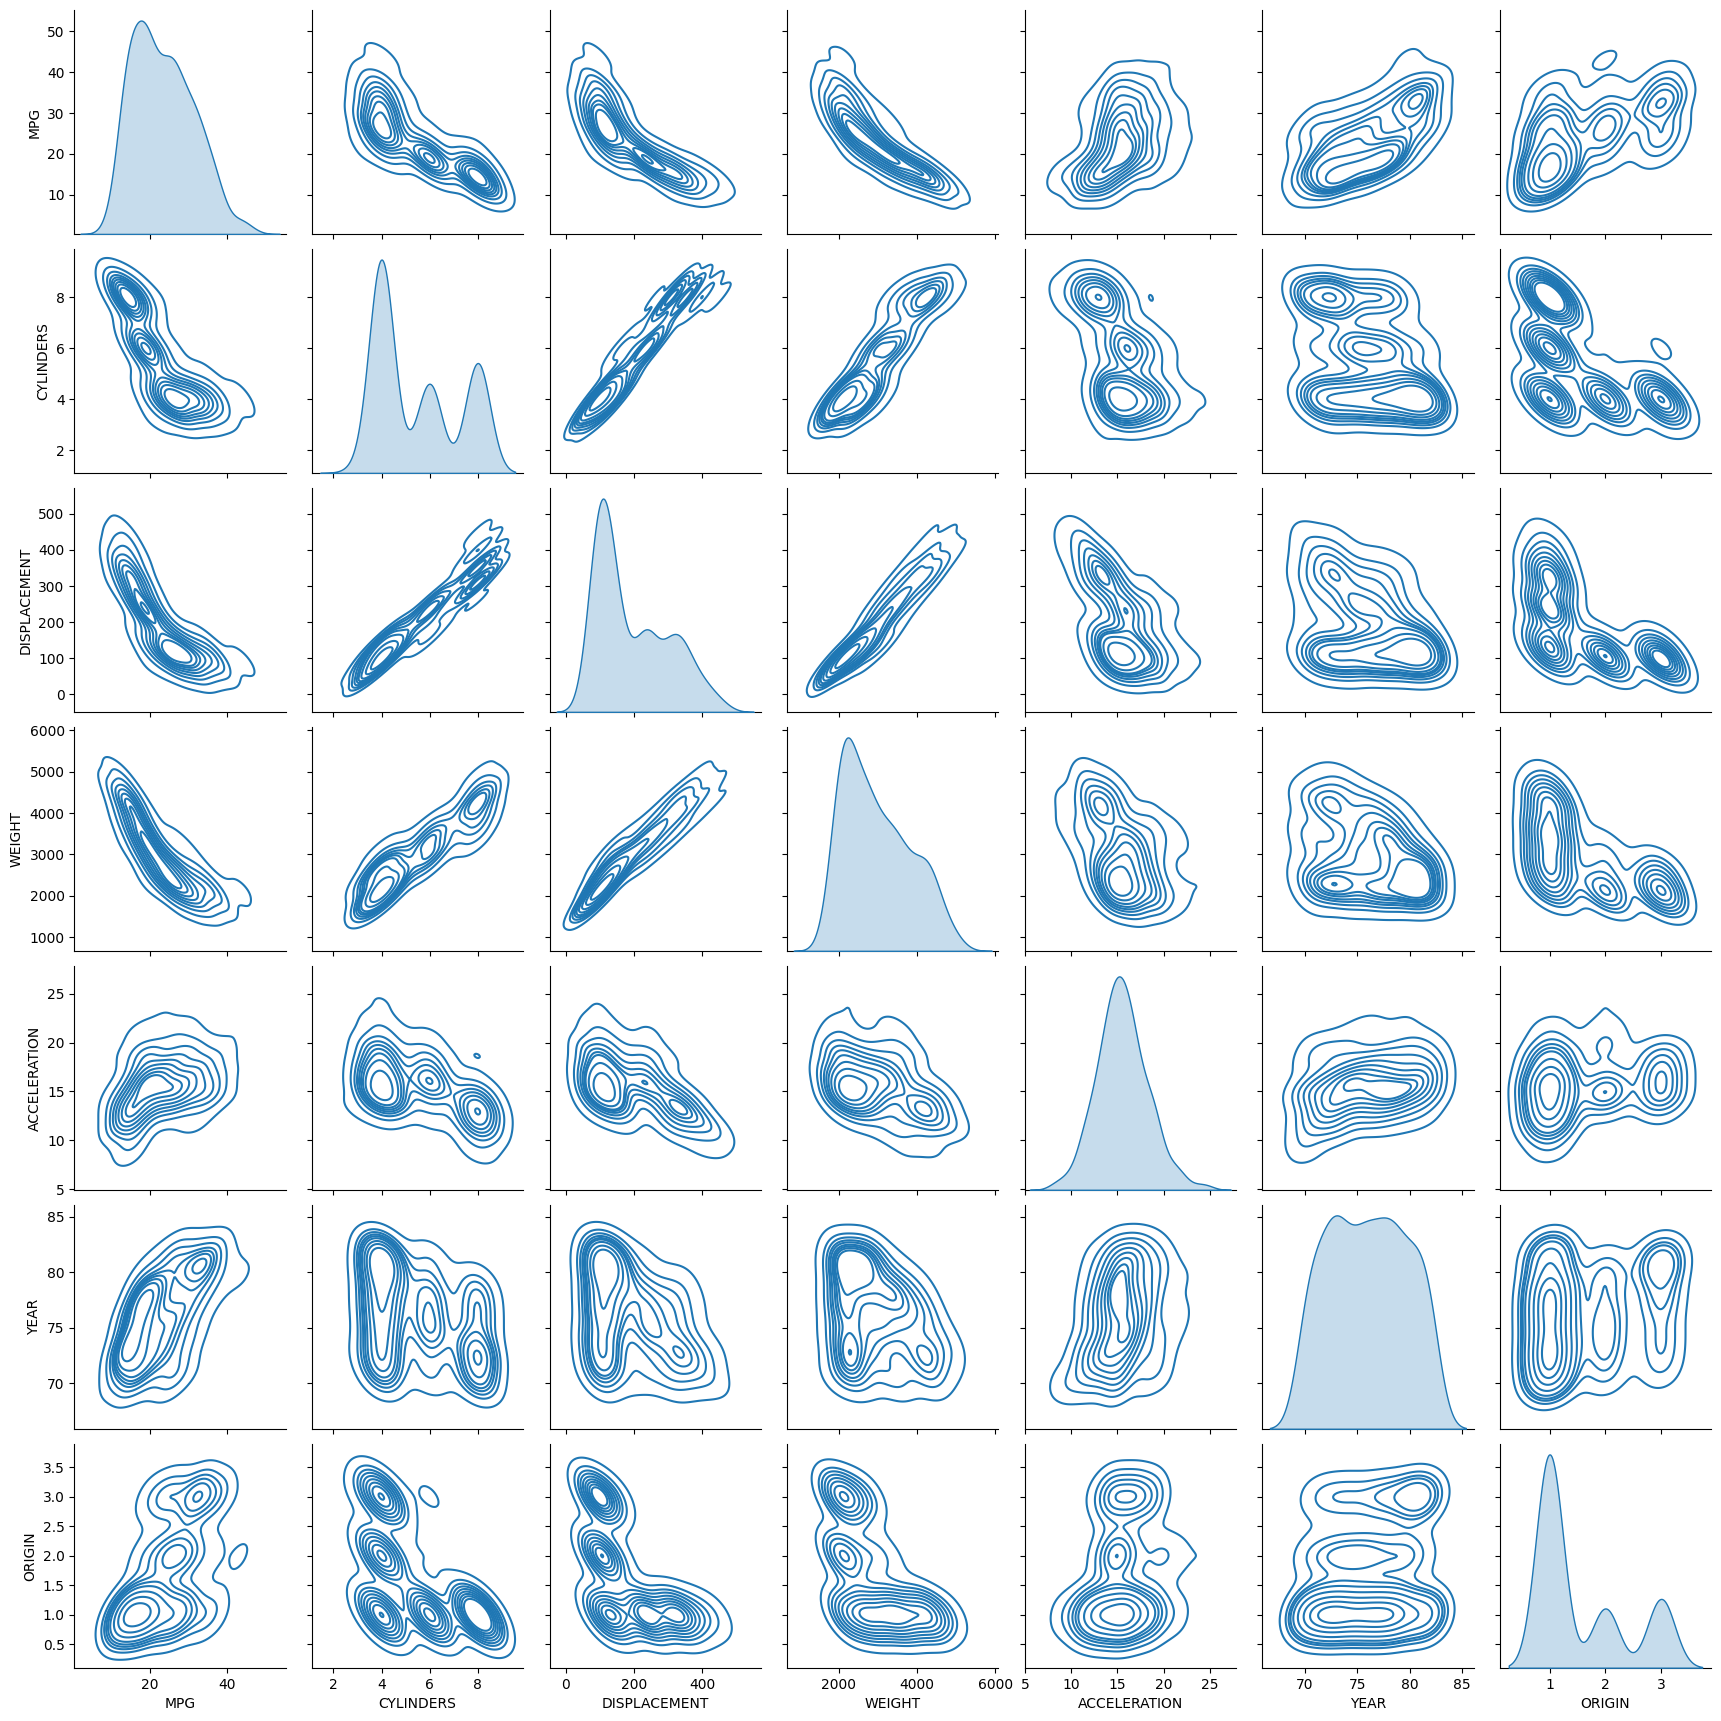

In [7]:
# Pairplot of the full data set auto
# Using the kind parameter for a more clearer visualization
sns.pairplot(auto, kind="kde")

**Conclusion:**

* **MPG:** It seems to have a strong correlation with weight, horsepower, and displacement. These connections appear non-linear and possibly exponential. The distribution of MPG is skewed.
* **DISPLACEMENT, HORSEPOWER, and WEIGHT:** They seem to have linear relationships with each other.
* **CYLINDERS:** It positively correlates with displacement, horsepower, and weight, but negatively with MPG.
* **ACCELERATION:** Its correlation with other features seems weak. Horsepower might have the strongest correlation. The distribution of acceleration appears to be normal.


### f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

**Observations:**

- **MPG Relationships:** When we look at the charts, we notice that displacement, horsepower, and weight are closely connected to MPG (miles per gallon). This means they have a big effect on how many miles a car can travel per gallon of fuel. We also see some patterns with cylinders and origin, which could be important for our analysis.

- **ACCELERATION Relationship:** However, when it comes to acceleration, we don't see a strong connection with MPG. This means how quickly a car speeds up doesn't seem to have a big impact on how many miles it can go on a gallon of fuel. Because of this, we might think about leaving out acceleration from our analysis.
